#German Tank Problem

[The German Tank Problem](https://www.albert.io/blog/german-tank-problem-explained-ap-statistics-review/) is a famous example of statistical estimation used during World War II by Allied forces to estimate the production of German military vehicles, particularly tanks. The problem illustrates how statistical methods can be used to make accurate predictions based on limited data.

 During the war, Allied forces would capture enemy tanks and note their serial numbers. Given that each tank was stamped with a serial number in sequence, these numbers provided crucial information about the total number of tanks produced. However, only a small sample of serial numbers would be available, and the challenge was to estimate the total production from this sample.

[Wikipedia](https://en.wikipedia.org/wiki/German_tank_problem)

Although I typically lean towards Bayesian methods, I've used a frequentist approach here to conduct simulations and estimate the true numbers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


def estimate_total_tanks(observed_serials):
    k = len(observed_serials)  # Number of observed tanks
    m = max(observed_serials)   # Maximum observed serial number

    # Estimaton
    estimated_N = m + (m / k) - 1 # Frequentist way

    return estimated_N

true_N = 1000 # True number of tanks
sample_size = 10
subsample_size = 5  # Size of the subsample
num_simulations = 10000
num_subsamples = 100  # Number of subsamples within each simulation for the approach with bootstrapping

#Without Bootstrapping

In [2]:
simulation_results = []

for i in range(num_simulations):
    # Randomly sample 10 serial numbers without replacement
    observed_serials = np.random.choice(range(1, true_N + 1), sample_size, replace=False)

    # Estimation
    estimated_tanks = estimate_total_tanks(observed_serials)

    # Record the results
    simulation_results.append({
        "Simulation": i + 1,
        "Observed Serial Numbers": sorted(observed_serials),
        "Estimated Tanks": estimated_tanks,
        "True Tanks": true_N,
        "Error": abs(estimated_tanks - true_N)
    })

# DataFrame
df_results = pd.DataFrame(simulation_results)
df_results.set_index('Simulation', inplace=True)
pd.set_option('display.max_colwidth', None)
df_results


,Observed Serial Numbers,Estimated Tanks,True Tanks,Error
Simulation,,,,
1,"[14, 109, 151, 184, 205, 369, 739, 805, 821, 960]",1055.0,1000,55.0
2,"[39, 341, 342, 428, 449, 575, 629, 688, 723, 866]",951.6,1000,48.4
3,"[51, 97, 182, 222, 229, 294, 454, 530, 696, 795]",873.5,1000,126.5
4,"[73, 145, 392, 497, 541, 733, 783, 956, 957, 985]",1082.5,1000,82.5
5,"[21, 57, 249, 262, 320, 586, 611, 841, 871, 872]",958.2,1000,41.8
...,...,...,...,...
9996,"[258, 409, 417, 442, 520, 618, 636, 790, 893, 907]",996.7,1000,3.3
9997,"[8, 65, 83, 247, 527, 889, 921, 952, 970, 976]",1072.6,1000,72.6
9998,"[74, 79, 118, 273, 305, 397, 449, 788, 832, 947]",1040.7,1000,40.7


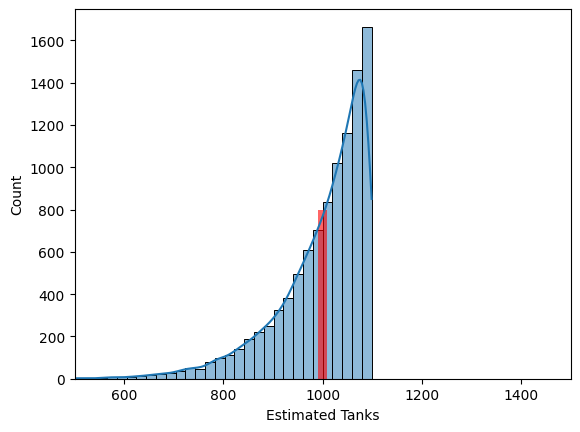

In [3]:
plt.xlim(500, 1500)
sns.histplot(df_results['Estimated Tanks'], kde=True, binwidth=20)
plt.hist(df_results['Estimated Tanks'], bins=[990, 1010], color='red', alpha=0.6)
plt.show()

#With bootstrapping

In [4]:

simulation_results = []

for i in range(num_simulations):
    # Randomly sample 10 serial numbers without replacement (observed tanks)
    observed_serials = np.random.choice(range(1, true_N + 1), sample_size, replace=False)

    estimates = []

    for _ in range(num_subsamples):
        # Subsample 5 serial numbers from the observed serial numbers without replacement
        subsample = np.random.choice(observed_serials, subsample_size, replace=False)

        # Estimation based on the subsample
        estimated_tanks = estimate_total_tanks(subsample)
        estimates.append(estimated_tanks)

    # Mean of the estimates from subsamples
    final_estimate = np.mean(estimates)

    simulation_results.append({
        "Simulation": i + 1,
        "Final Estimate": final_estimate,
        "True Tanks": true_N,
        "Error": abs(final_estimate - true_N)
    })

# DataFrame
df_results = pd.DataFrame(simulation_results)
df_results.set_index('Simulation', inplace=True)
pd.set_option('display.max_colwidth', None)

# Display the results
df_results


,Final Estimate,True Tanks,Error
Simulation,,,
1,892.244,1000,107.756
2,976.544,1000,23.456
3,1051.040,1000,51.040
4,813.416,1000,186.584
5,911.252,1000,88.748
...,...,...,...
9996,977.864,1000,22.136
9997,1050.416,1000,50.416
9998,961.652,1000,38.348


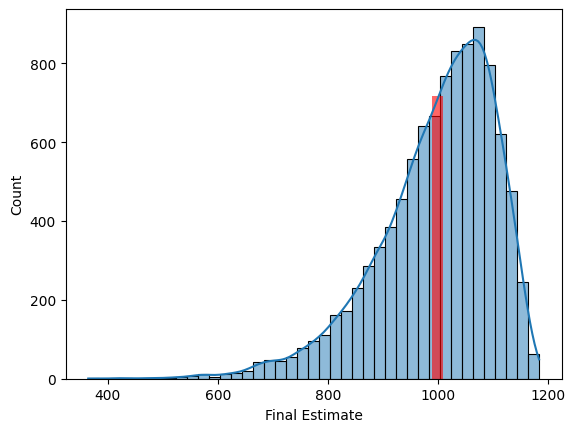

In [5]:
sns.histplot(df_results['Final Estimate'], kde=True, binwidth=20)
plt.hist(df_results['Final Estimate'], bins=[990, 1010], color='red', alpha=0.6)
plt.show()

Thank you. Please Let me know if you have any questions or suggestions. You can check out my other projects on my Github.